In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'Your Username'
os.environ['KAGGLE_KEY'] = 'Your Key'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:03<00:00, 67.3MB/s]
100% 207M/207M [00:03<00:00, 65.1MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
validation_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_non_mask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_dir_names = os.listdir(train_mask_dir)
train_non_mask_dir_names = os.listdir(train_non_mask_dir)

print(train_mask_dir_names[:10])
print(train_non_mask_dir_names[:10])

['0693.jpg', '1562.jpg', '1515.jpg', '1518.jpg', '1195.jpg', '1067.jpg', '0110.jpg', '0769.jpg', '0639.jpg', '1040.jpg']
['340.jpg', '253.jpg', '240.jpg', '351.jpg', '130.jpg', '151.jpg', '223.jpg', '97.jpg', '218.jpg', '329.jpg']


In [ ]:
import matplotlib.image as npimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_pic = []

for i in train_mask_dir_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

no_mask_pic = []

for i in train_non_mask_dir_names[0:8]:
  no_mask_pic.append(os.path.join(train_non_mask_dir,i))

<Figure size 864x864 with 0 Axes>

In [ ]:
print(mask_pic)

['/content/New Masks Dataset/Train/Mask/0693.jpg', '/content/New Masks Dataset/Train/Mask/1562.jpg', '/content/New Masks Dataset/Train/Mask/1515.jpg', '/content/New Masks Dataset/Train/Mask/1518.jpg', '/content/New Masks Dataset/Train/Mask/1195.jpg', '/content/New Masks Dataset/Train/Mask/1067.jpg', '/content/New Masks Dataset/Train/Mask/0110.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg']


In [ ]:
print(no_mask_pic)

['/content/New Masks Dataset/Train/Non Mask/340.jpg', '/content/New Masks Dataset/Train/Non Mask/253.jpg', '/content/New Masks Dataset/Train/Non Mask/240.jpg', '/content/New Masks Dataset/Train/Non Mask/351.jpg', '/content/New Masks Dataset/Train/Non Mask/130.jpg', '/content/New Masks Dataset/Train/Non Mask/151.jpg', '/content/New Masks Dataset/Train/Non Mask/223.jpg', '/content/New Masks Dataset/Train/Non Mask/97.jpg']


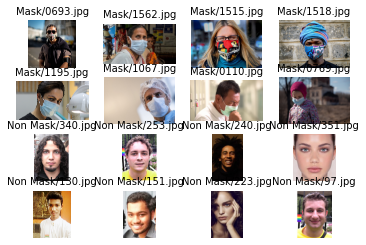

In [ ]:
merged_list = mask_pic + no_mask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  plt.axis('Off')
  image = npimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
plt.show()

***Image Augmentation***

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_images_generator = train_datagen.flow_from_directory(train_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

test_images_generator = test_datagen.flow_from_directory(test_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

valid_images_generator = validation_datagen.flow_from_directory(validation_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_images_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_images_generator.image_shape

(180, 180, 3)

***Building Convolutional neural network***

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

In [ ]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_generator,epochs=100,validation_data=valid_images_generator)

Epoch 1/100
19/19 [==============================] - 13s 670ms/step - loss: 4.9780 - accuracy: 0.5033 - val_loss: 0.6854 - val_accuracy: 0.5098
Epoch 2/100
19/19 [==============================] - 12s 643ms/step - loss: 0.5279 - accuracy: 0.7467 - val_loss: 0.4071 - val_accuracy: 0.8758
Epoch 3/100
19/19 [==============================] - 12s 653ms/step - loss: 0.3510 - accuracy: 0.8600 - val_loss: 0.4187 - val_accuracy: 0.8758
Epoch 4/100
19/19 [==============================] - 12s 642ms/step - loss: 0.3460 - accuracy: 0.8900 - val_loss: 0.3387 - val_accuracy: 0.9118
Epoch 5/100
19/19 [==============================] - 12s 645ms/step - loss: 0.3042 - accuracy: 0.8883 - val_loss: 0.3119 - val_accuracy: 0.8954
Epoch 6/100
19/19 [==============================] - 12s 643ms/step - loss: 0.2505 - accuracy: 0.9067 - val_loss: 0.2843 - val_accuracy: 0.8889
Epoch 7/100
19/19 [==============================] - 12s 642ms/step - loss: 0.2420 - accuracy: 0.9017 - val_loss: 0.2407 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epochs')

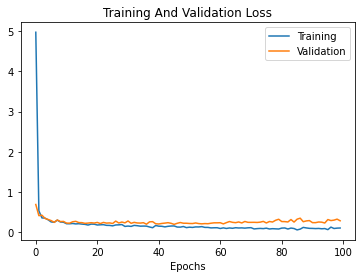

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [ ]:
test_loss , test_acc = model.evaluate(test_images_generator)

print("Test Loss: {} Test Accuracy: {}".format(test_loss,test_acc))

4/4 [==============================] - 1s 173ms/step - loss: 0.1161 - accuracy: 0.9400
Test Loss: 0.1160854697227478 Test Accuracy: 0.9399999976158142


**As We See Our Model Is Not Overfitted.**

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for file_name in uploaded.keys():
  img_path = '/content/'+file_name
  img = image.load_img(img_path,target_size=(180,180))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)

  print(file_name)

  if prediction == 0:
    print("Person Wearing A Mask")

  else:
    print("Person Not Wearing A Mask")

Saving mask.jpg to mask (1).jpg
Saving no_mask.jpg to no_mask.jpg
mask.jpg
Person Wearing A Mask
no_mask.jpg
Person Not Wearing A Mask


In [ ]:
model.save('face_mask_detection.h5')